sample of the training data:
Index(['normalized_lap', 'average_normalized_lap', 'lap_progress',
       'current_position_norm'],
      dtype='object')
Epoch 1/100


/Users/robsligter/Documents/Rug/Year 2/aml/Applied-ML-GROUP1/.venv/lib/python3.13/site-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


11771/11771 ━━━━━━━━━━━━━━━━━━━━ 7s 557us/step - loss: 28.6983 - mae: 4.2782 - val_loss: 22.7570 - val_mae: 3.8231
Epoch 2/100
11771/11771 ━━━━━━━━━━━━━━━━━━━━ 6s 543us/step - loss: 26.1796 - mae: 4.0957 - val_loss: 20.1930 - val_mae: 3.6008
Epoch 3/100
11771/11771 ━━━━━━━━━━━━━━━━━━━━ 6s 516us/step - loss: 25.6321 - mae: 4.0347 - val_loss: 20.7701 - val_mae: 3.6000
Epoch 4/100
11771/11771 ━━━━━━━━━━━━━━━━━━━━ 6s 542us/step - loss: 25.1110 - mae: 3.9802 - val_loss: 19.8860 - val_mae: 3.6309
Epoch 5/100
11771/11771 ━━━━━━━━━━━━━━━━━━━━ 6s 528us/step - loss: 24.8856 - mae: 3.9528 - val_loss: 19.9697 - val_mae: 3.5323
Epoch 6/100
11771/11771 ━━━━━━━━━━━━━━━━━━━━ 6s 511us/step - loss: 24.6197 - mae: 3.9264 - val_loss: 18.9533 - val_mae: 3.4747
Epoch 7/100
11771/11771 ━━━━━━━━━━━━━━━━━━━━ 6s 516us/step - loss: 24.5311 - mae: 3.9166 - val_loss: 19.2316 - val_mae: 3.4788
Epoch 8/100
11771/11771 ━━━━━━━━━━━━━━━━━━━━ 6s 514us/step - loss: 24.4897 - mae: 3.9130 - val_loss: 19.8210 - val_mae: 3.5

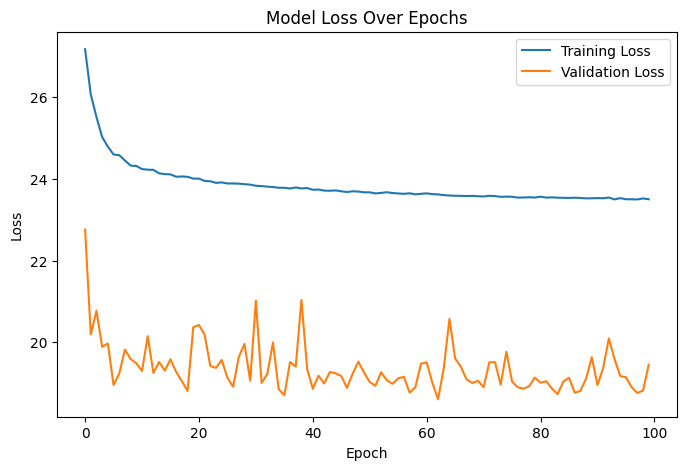

In [ ]:
import pandas as pd
import keras
import numpy as np
import matplotlib.pyplot as plt

train_data = pd.read_csv("data/train_data.csv")
test_data = pd.read_csv("data/test_data.csv")
print
x_train = train_data[['normalized_lap','average_normalized_lap','lap_progress','current_position_norm']]
y_train = train_data['finishing_position']

x_test = test_data[['normalized_lap','average_normalized_lap','lap_progress','current_position_norm']]
y_test = test_data['finishing_position']

print(f"sample of the training data:\n{x_train.columns}")
model = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(x_train.shape[1],)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(1, activation='linear')
])
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
history = model.fit(x_train, y_train, epochs=300, batch_size=64, validation_split=0.2)
loss, mae = model.evaluate(x_test, y_test)
print(f"Test Loss: {loss}, Test MAE: {mae}")



plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [57]:
# In the cell with id "995aacf9"
test_sample = test_data.sample(10)
for index, sample in test_sample.iterrows():
    sample_features = sample[['normalized_lap', 'average_normalized_lap', 'lap_progress', 'current_position_norm']].values.reshape(1, -1)
    print(f"Sample features: {sample[['normalized_lap', 'average_normalized_lap', 'lap_progress', 'current_position_norm']]}")
    print(f"True Position: {sample['finishing_position']}")
    print(f"Predicted Position: {model.predict(sample_features)}")
    print("===================================")

Sample features: normalized_lap            1.304895
average_normalized_lap    1.072755
lap_progress              0.309859
current_position_norm     1.000000
Name: 6400, dtype: float64
True Position: 8.0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Predicted Position: [[15.739957]]
Sample features: normalized_lap            1.138583
average_normalized_lap    1.138583
lap_progress              0.014286
current_position_norm     0.800000
Name: 31858, dtype: float64
True Position: 20.0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Predicted Position: [[15.784648]]
Sample features: normalized_lap            1.024822
average_normalized_lap    1.022555
lap_progress              0.263158
current_position_norm     0.750000
Name: 18770, dtype: float64
True Position: 5.0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Predicted Position: [[9.77352]]
Sample features: normalized_lap            1.007935
average_normalized_lap    1.021789
lap_progress              0.049180
current_position_norm     0.166667
Name: 59427, dtyp